Index number : 190026T

Name         : AHAMED M.I.I

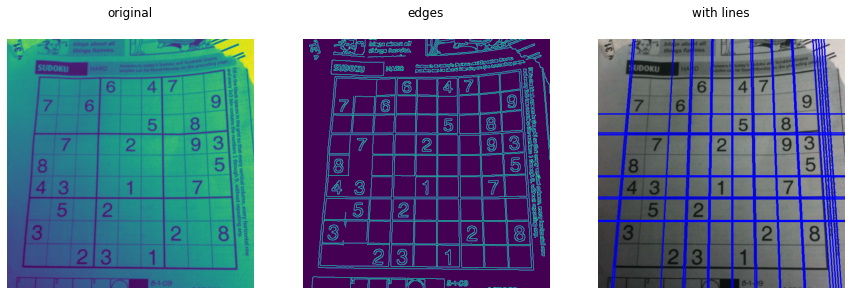

In [4]:
#hough transforms

#1)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sudoku = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_06\sudoku.png', cv.IMREAD_COLOR)
assert sudoku is not None

sudoku_gray = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)
edges = cv.Canny(sudoku_gray, 50, 150, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for l in lines:
    rho, theta = l[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a)) 
    x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a)) 
    cv.line(sudoku, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1, 3, figsize=(15,20))
ax[0].imshow(sudoku_gray)
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(edges)
ax[1].title.set_text('edges')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(sudoku)
ax[2].title.set_text('with lines')
ax[2].axis('off')
ax[2].xaxis.tick_top()

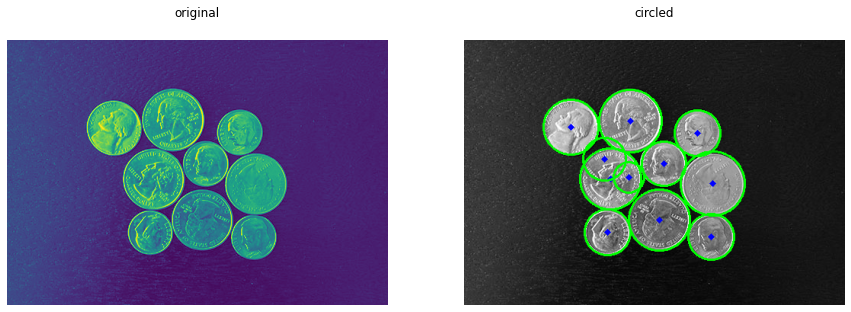

In [6]:
#2)

coins_original = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_06\coins.jpg', 0)
assert coins_original is not None

coins = cv.medianBlur(coins_original, 5)
coins_circle = cv.cvtColor(coins_original, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(coins ,cv.HOUGH_GRADIENT,1 ,20, param1=150, param2=20, minRadius=20, maxRadius=50)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:    
    cv.circle(coins_circle, (i[0],i[1]), i[2], (0, 255, 0), 2)    # draw the outer circle    
    cv.circle(coins_circle, (i[0],i[1]), 2, (0, 0, 255), 3)       # draw the center of the circle

fig, ax = plt.subplots(1, 2, figsize=(15,20))
ax[0].imshow(coins_original)
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(coins_circle)
ax[1].title.set_text('circled')
ax[1].axis('off')
ax[1].xaxis.tick_top()

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


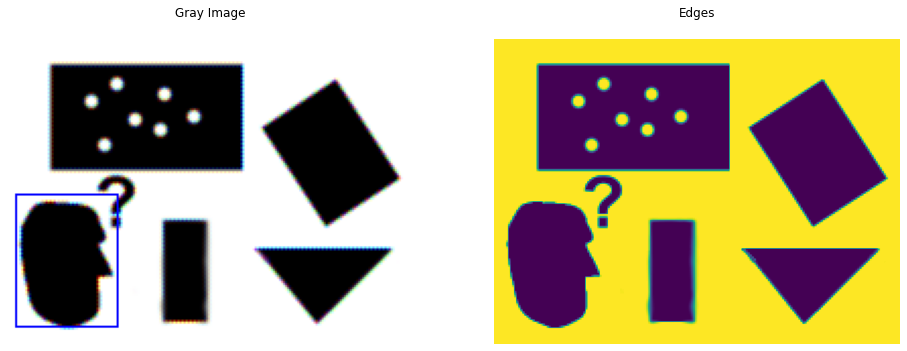

In [9]:
#3)

img = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_06\pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

templ = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_06\templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(img, 50, 250)
templ_edges = cv. Canny(templ, 50, 250)

alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)

positions, votes = alg.detect(im_edges)
out = cv.cvtColor(img, cv.COLOR_BAYER_BG2BGR)

for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0]/2.*scale
    halfWidth = templ.shape[1]/2.*scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x,y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))

fig, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(out)
ax[0].set_title('Gray Image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(img)
ax[1].set_title('Edges')
ax[1].axis('off')
ax[1].xaxis.tick_top()

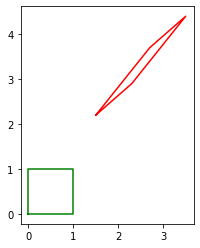

In [10]:
#4)

a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])

fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])

ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

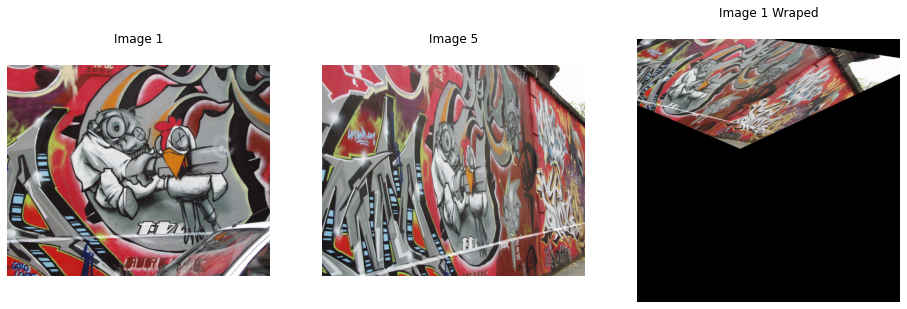

In [19]:
#5)

im1 = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_05\graffiti\img1.ppm',cv.IMREAD_ANYCOLOR)
assert im1 is not None
im1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)

im5 = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_05\graffiti\img5.ppm',cv.IMREAD_ANYCOLOR)
assert im5 is not None
im5 = cv.cvtColor(im5,cv.COLOR_BGR2RGB)

H = []

with open(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_05\graffiti\H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])

im1to4 = cv.warpPerspective(im5, np.linalg.inv(H), (2000, 2000))

fig, ax = plt.subplots(1,3, figsize=(16,16))
ax[0].imshow(im1,cmap='gray')
ax[0].set_title('Image 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(im5,cmap='gray')
ax[1].set_title('Image 5')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(im1to4,cmap='gray')
ax[2].set_title('Image 1 Wraped')
ax[2].axis('off')
ax[2].xaxis.tick_top()


# plt.show()